In [39]:
import pickle as pk
from nltk import WordNetLemmatizer
import nltk 
from nltk.corpus import stopwords
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
import string 
import pandas as pd
import numpy as np
import matplotlib as plt
# nltk.download(['punkt','stopwords'])

In [2]:
with open('text.pkl','rb') as file :
    book = pk.load(file)
book

'PIn\tmemory\tof\tAmos\tTversky\nPContents\n\t\nIntroduction\n\t\nPart\tI.\tTwo\tSystems\n\t\n1.\tThe\tCharacters\tof\tthe\tStory\n\t\n2.\tAttention\tand\tEffort\n\t\n3.\tThe\tLazy\tController\n\t\n4.\tThe\tAssociative\tMachine\n\t\n5.\tCognitive\tEase\n\t\n6.\tNorms,\tSurprises,\tand\tCauses\n\t\n7.\tA\tMachine\tfor\tJumping\tto\tConclusions\n\t\n8.\tHow\tJudgments\tHappen\n\t\n9.\tAnswering\tan\tEasier\tQuestion\n\tPart\tII.\tHeuristics\tand\tBiases\n\t\n10.\tThe\tLaw\tof\tSmall\tNumbers\n\t\n<5>\n11.\tAnchors\n\t\n12.\tThe\tScience\tof\tAvailability\n\t\n13.\tAvailability,\tEmotion,\tand\tRisk\n\t\n14.\tTom\tW’s\tSpecialty\n\t\n15.\tLinda:\tLess\tis\tMore\n\t\n16.\tCauses\tTrump\tStatistics\n\t\n17.\tRegression\tto\tthe\tMean\n\t\n18.\tTaming\tIntuitive\tPredictions\n\t\nPart\tIII.\tOverconfidence\n\t\n19.\tThe\tIllusion\tof\tUnderstanding\n\t\n20.\tThe\tIllusion\tof\tValidity\n\t\n21.\tIntuitions\tVs.\tFormulas\n\t22.\tExpert\tIntuition:\tWhen\tCan\tWe\tTrust\tIt?\n\t\n23.\tThe\tOu

In [3]:
p = book.split(".")
p1 = p[44:]

In [4]:
p1_1 = []
for e in p1:
    p1_1.extend(e.split('\t\nP'))
len(p1_1)

9259

In [5]:
import re
import string
root = lambda ls , n : {'original': ls[n-1], 'stem': SnowballStemmer.stem(ls[n-1]), 'lemma': WordNetLemmatizer.lemmatize(ls[n-1])}
string.whitespace

' \t\n\r\x0b\x0c'

In [6]:
def remove_punctuation(post):

    return ''.join([l for l in post if l not in string.punctuation])
p1_2 = [remove_punctuation(_).lower() for _ in p1_1]

In [7]:
def binary_search(data, target):
  """
  Performs binary search on a sorted list of strings.

  Args:
      data (list[str]): The sorted list of strings.
      target (str): The string to search for.

  Returns:
      int: The index of the target string if found, otherwise -1.
  """
  low = 0
  high = len(data) - 1
  while low <= high:
    mid = (low + high) // 2
    if data[mid] == target:
      pass
      # return mid
    elif data[mid] < target:
      low = mid + 1
    else:
      high = mid - 1
  return target

def remove_stop_words(tokens):
    ss = np.array(sorted(stopwords.words('english')) , dtype=str)
    word_array = np.array(tokens , dtype=str)
    np.isin(word_array , ss)
    return [ binary_search(ss,_) for _ in tokens]

In [44]:
len(np.array(sorted(stopwords.words('english')) , dtype=str))

179

In [7]:
p1_2

['\tthinking\tabout\tlife\n\t\nconclusions\n\t\nappendix\ta\tjudgment\tunder\tuncertainty\n\t\nappendix\tb\tchoices\tvalues\tand\tframes\n\t\nacknowledgments\n\t\nnotes\n\t\nindex\n\t\n',
 'introduction\n\t\nevery\tauthor\ti\tsuppose\thas\tin\tmind\ta\tsetting\tin\twhich\treaders\tof\this\tor\ther\twork\tcould\nbenefit\tfrom\thaving\tread\tit',
 '\tmine\tis\tthe\tproverbial\toffice\twatercooler\twhere\topinions\tare\nshared\tand\tgossip\tis\texchanged',
 '\ti\thope\tto\tenrich\tthe\tvocabulary\tthat\tpeople\tuse\twhen\tthey\ntalk\tabout\tthe\tjudgments\tand\tchoices\tof\tothers\tthe\tcompany’s\tnew\tpolicies\tor\ta\ncolleague’s\tinvestment\tdecisions',
 '\twhy\tbe\tconcerned\twith\tgossip\tbecause\tit\tis\tmuch\neasier\tas\twell\tas\tfar\tmore\tenjoyable\tto\tidentify\tand\tlabel\tthe\tmistakes\tof\tothers\tthan\tto\nrecognize\tour\town',
 '\tquestioning\twhat\twe\tbelieve\tand\twant\tis\tdifficult\tat\tthe\tbest\tof\ttimes\nand\tespecially\tdifficult\twhen\twe\tmost\tneed\tto\tdo\tit\

In [8]:
p1_3 = [TreebankWordTokenizer().tokenize(text=_)for _ in p1_2]
len(p1_3)

9259

In [9]:
allw = []
for _ in p1_3 :
    allw.extend(_)
len(allw)

190597

In [16]:
def get_difference(list1):
  """
  Finds elements present in list1 but not in list2.

  Args:
      list1: The first list (NumPy array).
      list2: The second list (NumPy array).

  Returns:
      A NumPy array containing elements from list1 that are not in list2.
  """

  # Convert lists to NumPy arrays if necessary
  list1 = np.array(list1 , dtype=str)
  list2 = np.array(sorted(stopwords.words('english')) , dtype=str)

  # Use setdiff1d for efficient difference operation
  not_in_list2 = ~np.in1d(list1, list2)

  # Filter list1 based on the mask (includes duplicates)
  difference = list1[not_in_list2]

  return difference

In [ ]:
def count_words (ls):
    dic = {}
    for _ in ls :
        if _ in dic :
            dic[_] += 1
        else : dic[_] = 1
    

In [18]:
allw2= get_difference(allw)
print(len(allw2))
allw2

103559


array(['thinking', 'life', 'conclusions', ..., '34', '1984', 'p'],
      dtype='<U64')

In [28]:
def word_count(ls):
    uniquew =set(ls)
    print(len(uniquew))
    dic_countW={}
    for _ in uniquew :
        dic_countW[_]=ls.count(_)
    return dic_countW

In [ ]:
wdic2 = word_count(allw2.tolist())

In [31]:
words_df2 = pd.DataFrame(list(wdic2.items()), columns=['word', 'count'])
sort_words_df = words_df2.sort_values(by=['count'] , ascending=False)
sort_words_df

,word,count
1218,people,536
8238,one,507
2390,system,495
8721,would,474
543,two,454
...,...,...
8612,clambering,1
8611,focusedon,1
3195,5′1″,1
8607,lazily,1


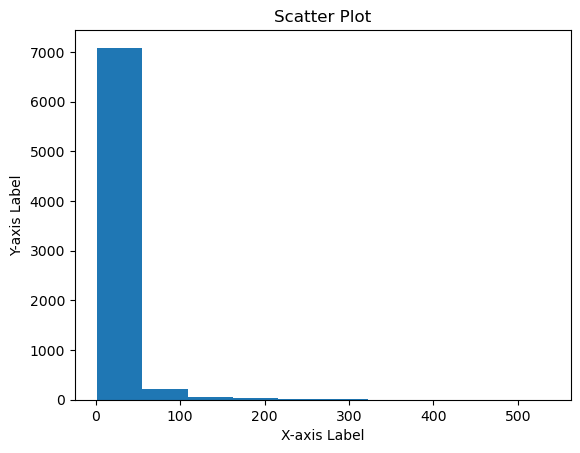

In [42]:
df2 = sort_words_df[sort_words_df['count']>1]
import matplotlib.pyplot as plt

x = df2['count']
# Create the scatter plot
plt.hist(x)

# Add labels and title for clarity
plt.xlabel("X-axis Label")
plt.ylabel("Y-axis Label")
plt.title("Scatter Plot")

# Show the plot
plt.show()

In [46]:
df2.to_csv('how_to_take_smart_notes.csv.csv')

In [49]:
with open ("how_to_take_smart_notes(sentence).pkl",'wb')as f :
    pk.dump(p1_2,f)
